In [1]:
# CNN(Convolutional Neural Network)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop 
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
im_rows = 28 # 画像の縦ピクセルサイズ
im_cols = 28 # 画像の横ピクセルサイズ
im_color = 1 # 画像の色空間/グレイスケール
in_shape = (im_rows, im_cols, im_color)
out_size = 10

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)

In [4]:
model = Sequential()
model.add(Conv2D(32, 
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 139s 295ms/step - loss: 0.4375 - accuracy: 0.8628 - val_loss: 0.0516 - val_accuracy: 0.9839
Epoch 2/12
469/469 [==============================] - 79s 167ms/step - loss: 0.0870 - accuracy: 0.9742 - val_loss: 0.0383 - val_accuracy: 0.9874
Epoch 3/12
469/469 [==============================] - 76s 161ms/step - loss: 0.0618 - accuracy: 0.9820 - val_loss: 0.0353 - val_accuracy: 0.9891
Epoch 4/12
469/469 [==============================] - 76s 162ms/step - loss: 0.0476 - accuracy: 0.9859 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 5/12
469/469 [==============================] - 76s 163ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 6/12
469/469 [==============================] - 77s 164ms/step - loss: 0.0455 - accuracy: 0.9868 - val_loss: 0.0333 - val_accuracy: 0.9896
Epoch 7/12
469/469 [==============================] - 77s 165ms/step - loss: 0.0419 - accuracy: 0.9883 - val_loss: 0.0357 - val_a

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

313/313 [==============================] - 3s 11ms/step - loss: 0.0328 - accuracy: 0.9906
正解率= 0.9905999898910522 loss= 0.032791655510663986


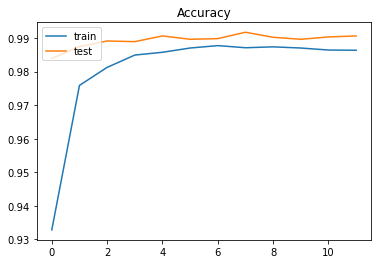

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

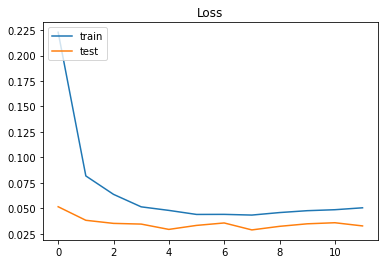

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()